# Ön Hazırlık LAB-3

## Ad Soyad: Selin Ünlü
## Öğrenci No: 161024016

##### 2 KODLAR

###### 2.1 Ayrık-Zamanlı Fourier dönüşümü (DTFT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

%matplotlib notebook

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

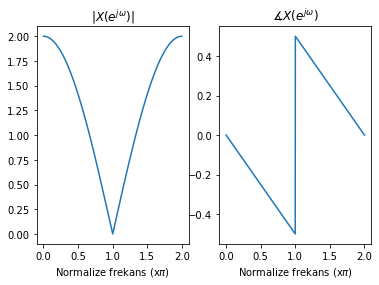

In [2]:
w_cont = np.linspace(0, 2*np.pi, 1000)
w = np.linspace(0, 2*np.pi, 1000)
X_abs = np.abs(2*np.cos(w/2))
X_phase = np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])

plt.subplot(121)
plt.plot(w/np.pi, X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')

plt.subplot(122)
plt.plot(w/np.pi, X_phase/np.pi)
plt.title('$\measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

###### 2.2 Ayrık Fourier Dönüşümü (DFT) 

In [3]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0

In [4]:
N=8
X_k=np.zeros([N],dtype=complex)
for k in range(N):
    for n in range(N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)

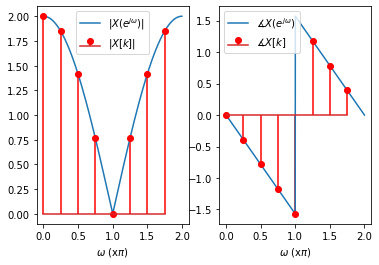

In [5]:
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs, label='$|X(e^{j\omega})|$')

w_discrete=np.arange(0, N)*(2*np.pi/N)

plt.stem(w_discrete/np.pi, X_k_abs, 'r-', label='$|X[k]|$', markerfmt='ro', use_line_collection = True)
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase, label='$\measuredangle X(e^{j\omega})$')

plt.stem(w_discrete/np.pi, X_k_phase, 'r-', label='$\measuredangle X[k]$', markerfmt='ro', use_line_collection = True)
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper left')

###### 2.2.1 Hızlı Fourier Dönüşümü (FFT)

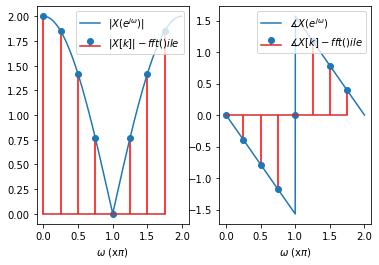

In [6]:
from scipy.fftpack import fft, ifft
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)

## Grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs, label='$|X(e^{j\omega})|$')

w_discrete=np.arange(0,N)*(2*np.pi/N)

plt.stem(w_discrete/np.pi, abs_fft_X, 'ro-', label='$|X[k]|-fft() ile$', use_line_collection = True)
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase, label='$ \measuredangle X(e^{j\omega})$')

plt.stem(w_discrete/np.pi, phase_fft_X, 'ro-', label='$ \measuredangle X[k]-fft() ile$', use_line_collection = True)
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

###### 2.2.2 Frekansta Örnekleme  → Zamanda Periyodiklik İlişkisi

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft

Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

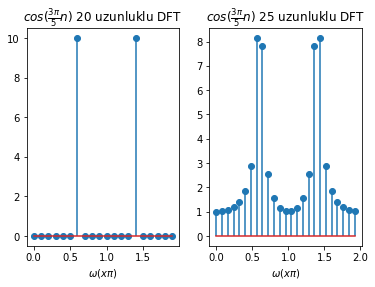

In [8]:
#20uzunluklu versiyon
n1=np.arange(0,20)
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1))
w_disc_1=n1*2*np.pi/len(n1)   #0-2pi arası 2pi/20 adımlı vektör (2pi noktası dahil değil)

plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs, use_line_collection = True)
plt.xlabel('$\omega(x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 20 uzunluklu DFT')

#25uzunluklu versiyon
n2=np.arange(0,25)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2)   #0-2pi arası 2pi/25 adımlı vektör (2pi noktası dahil değil)

plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs, use_line_collection = True)
plt.xlabel('$\omega(x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

###### 2.2.3 DFT Genlik ve Faz Grafiklerinden İşaret Sentezi

In [9]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.fftpack import fft , ifft

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi) = \\measuredangle a_k(\\times\\pi)$')

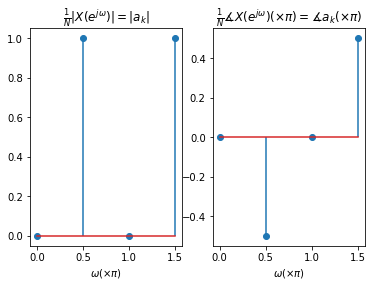

In [10]:
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2piarasında(2pinoktası dahil değil) 2pi/4adımlı vektör 
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)

plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs, use_line_collection = True)
plt.xlabel('$\omega(\\times\pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})| = |a_{k}|$')

plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi, use_line_collection = True)
plt.xlabel('$\omega (\\times\pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi) = \measuredangle a_k(\\times\pi)$')

##### 3 BASAMAK, DÜRTÜ İŞARETLERİNİN KOLAYCA OLUŞTURULMASI(Bonus bölümü)

<StemContainer object of 3 artists>

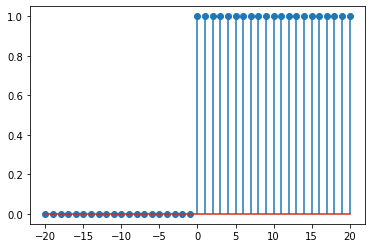

In [11]:
n = np.arange(-20,21)
#yol-1
u_n = np.array([0 if i<0 else 1 for i in n]) 
#yol-2
u_n = []

for i in n:
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
        
#yol-3(buyoludiğeryollarlakıyaslarsakönermiyorum)
u_n = np.concatenate((np.zeros(20),np.ones(21)))
#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0

plt.stem(n, u_n, use_line_collection = True)

<StemContainer object of 3 artists>

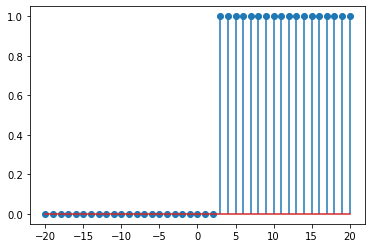

In [12]:
n= np.arange(-20,21)
u_n_3 = np.array([0 if i<3 else 1 for i in n])

plt.stem(n, u_n_3, use_line_collection = True)

<StemContainer object of 3 artists>

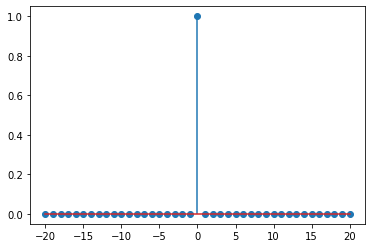

In [13]:
n= np.arange(-20,21)
dirac_n = np.array([0 if i!=0 else 1 for i in n])

plt.stem(n, dirac_n, use_line_collection = True)

<StemContainer object of 3 artists>

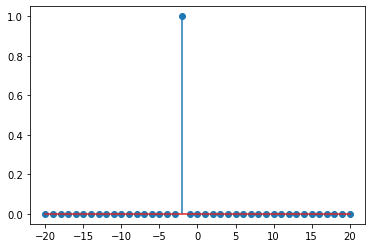

In [14]:
n= np.arange(-20,21)
dirac_n_arti_2 = np.array([0 if i!=-2 else 1 for i in n]) 

plt.stem(n, dirac_n_arti_2, use_line_collection = True)

<StemContainer object of 3 artists>

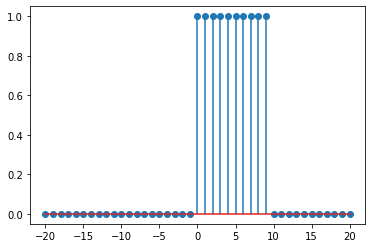

In [15]:
n= np.arange(-20,21)
u_n_eksi_u_n_10 = np.array([1 if i>=0 and i<10 else 0 for i in n])

plt.stem(n, u_n_eksi_u_n_10, use_line_collection = True)

# SORU-1

### a) 

###### H(e^(j*w)) = (1 - e^(j*w))

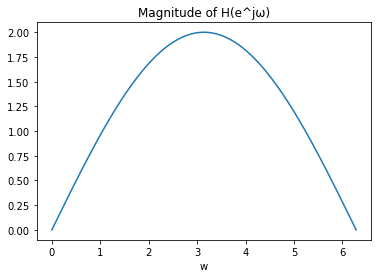

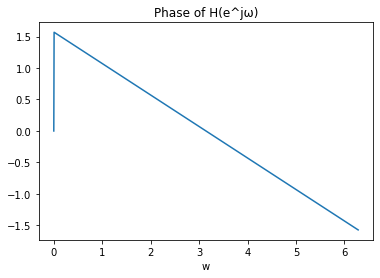

In [16]:
j = np.complex(0, 1)

w = np.linspace(0, 2*np.pi, 1000, dtype=float)
H = (1 - np.exp(-j*w))

plt.plot(w, np.abs(H))
plt.title('Magnitude of H(e^jω)')
plt.xlabel('w')
plt.show()

plt.plot(w, np.angle(H))
plt.title('Phase of H(e^jω)')
plt.xlabel('w')
plt.show()

### b) Band Geçiren Filtre.

### c)

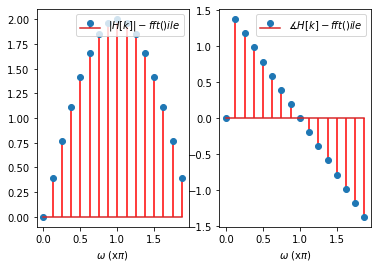

In [17]:
from scipy.fftpack import fft , ifft 
N=16
h=np.array([1, -1]) 
fft_H = fft(h, 16)
abs_fft_H = np.abs(fft_H)
phase_fft_H = np.angle(fft_H) 

plt.figure() 
plt.subplot(121) 

w_discrete=np.arange(0, N) * (2 * np.pi / N) 
plt.stem(w_discrete / np.pi, abs_fft_H, 'ro-', label='$|H[k]|-fft() ile$', use_line_collection =True)
plt.xlabel('$\omega$ (x$\pi$)') 
plt.legend(loc = 'upper right') 

plt.subplot(122) 
 
plt.stem(w_discrete / np.pi, phase_fft_H, 'ro-', label = '$ \measuredangle H[k]-fft() ile$', use_line_collection = True)
plt.xlabel('$\omega$ (x$\pi$)') 
plt.legend(loc = 'upper right')

# SORU-2

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times \\pi)=\\measuredangle a_k(\\times \\pi)$')

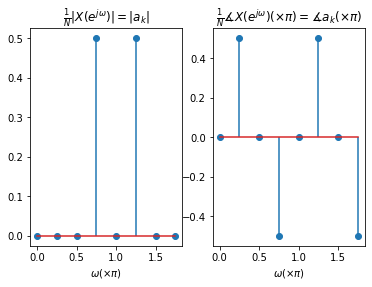

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.fftpack import fft , ifft
x = np.array([0, 0.707106, -1 ,0.707106, 0, -0.707106, 1, -0.707106], dtype = float) 
N = len(x)
n = np.arange(0,8) 
w_disc = n * 2 * np.pi / N 
X_abs = np.abs(fft(x) / N) 
X_phase = np.angle(fft(x) / N) 

plt.subplot(121) 
plt.stem(w_disc / np.pi, X_abs, use_line_collection = True) 
plt.xlabel('$\omega (\\times \pi)$') 
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$') 
plt.subplot(122) 
plt.stem(w_disc / np.pi, X_phase / np.pi, use_line_collection = True) 
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')

###### A = 1 ; w0 = 0.75pi ; phi= -pi/2